#**Data Exploration**

> Before I start working on the assignment, I will be exploring the data so that I will make sure my data doesn't contain any null or invalid values.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# I uploaded the dataset in my Google Drive so that each time I connect to the notebook
# I won't need to re-upload it again and again 
summer_dataframe = pd.read_csv('drive/MyDrive/summer.csv')
summer_dataframe.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [3]:
# The data contains 31165 records
len(summer_dataframe)

31165

In [4]:
# As the description is showing up below, the data has records from 1896 till 2012
# which means 29-Olympics-season
# As you might have noticed, the description only shows the Year column
# because it's the only column that has numeric values 
summer_dataframe.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [5]:
# From this informational table, we can notice that our dataset contains 4 null values in country column 
# but, these values won't affect that much our analysis process 
# so, no need for preprocessing the data and we can step ahead to our assignment 
summer_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


#**Summer Olympics Data Analysis Assignment**

In [6]:
summer_dataframe.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


**1. In how many cities Summer Olympics is held so far?**

In [7]:
print('There are {} unique cities that held the Summer Olympics so far, which are {}'.format(
    summer_dataframe['City'].nunique(), summer_dataframe['City'].unique()))

There are 22 unique cities that held the Summer Olympics so far, which are ['Athens' 'Paris' 'St Louis' 'London' 'Stockholm' 'Antwerp' 'Amsterdam'
 'Los Angeles' 'Berlin' 'Helsinki' 'Melbourne / Stockholm' 'Rome' 'Tokyo'
 'Mexico' 'Munich' 'Montreal' 'Moscow' 'Seoul' 'Barcelona' 'Atlanta'
 'Sydney' 'Beijing']


**2. Which sport is having most number of Gold Medals so far? (Top 5)**

>>> Top 5 sports that have most number of Gold Medals so far:
 Sport
Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Medal, dtype: int64


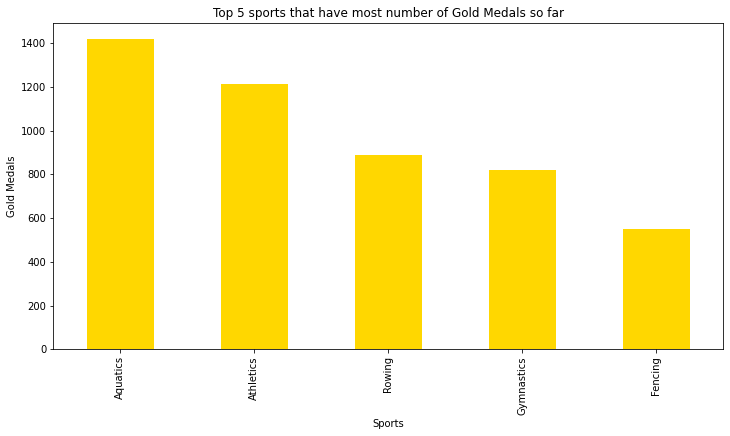

In [28]:
# For this question, I will be filtering my dataframe to only contain gold medals for each record 
df = summer_dataframe[summer_dataframe['Medal'] == 'Gold']
# Then, I'll group the dataframe by each unique sport according to the number of gold medals each sport has 
q2 = df.groupby(['Sport']).count()['Medal'].sort_values(ascending=False).head()
print('>>> Top 5 sports that have most number of Gold Medals so far:\n',q1)
q2.plot.bar(xlabel='Sports', ylabel='Gold Medals', color='gold', figsize=(12,6),
                                    title='Top 5 sports that have most number of Gold Medals so far')

In [12]:
# df.groupby(['Sport']).count()['Medal'] returns a result in series type so I am going to transfer it into 
# dictionary type so that I can extract the top sport with gold medals 
dic = dict(df.groupby(['Sport']).count()['Medal']) 
# I am using this approach to sort the dictionary but by using this approach dic will be of array of tuples 
# structure instead of remaining of type dictionary 
dic = sorted(dic.items(), key=lambda x:x[1], reverse=True)
print(dic[0][0])
print('The sport that has top number of Gold medals is {} with {} Gold medals.'.format(
    dic[0][0], dic[0][1]
))

Aquatics
The sport that has top number of Gold medals is Aquatics with 1421 Gold medals.


**3. Which sport is having most number of medals so far? (Top 5)***

>>> Top 5 sports that have most number of Medals so far:
 Sport
Aquatics      4170
Athletics     3638
Rowing        2667
Gymnastics    2307
Fencing       1613
Name: Medal, dtype: int64


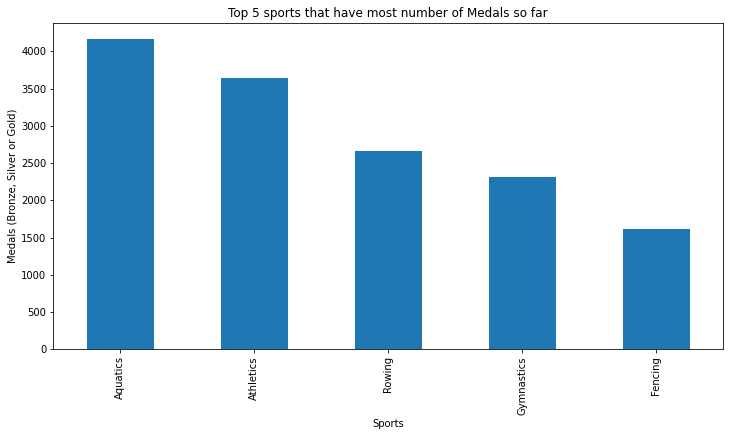

In [27]:
# The only change I will make for this question is that I am going to work with the whole data instead of the filtered one
q3 = summer_dataframe.groupby(['Sport']).count()['Medal'].sort_values(ascending=False).head()
print('>>> Top 5 sports that have most number of Medals so far:\n',q2)
q3.plot.bar(xlabel='Sports', ylabel='Medals (Bronze, Silver or Gold)', figsize=(12,6),
                                    title='Top 5 sports that have most number of Medals so far')

In [14]:
# I will be using the same approach like the previous question to print the answer 
dic = dict(summer_dataframe.groupby(['Sport']).count()['Medal'])  
dic = sorted(dic.items(), key=lambda x:x[1], reverse=True)
print(dic[0][0])
print('The sport that has most number of medals (Bronze, Silver or Gold) is {} with {} medals.'.format(
    dic[0][0], dic[0][1]
))

Aquatics
The sport that has most number of medals (Bronze, Silver or Gold) is Aquatics with 4170 medals.


**4. Which player has won most number of medals? (Top 5)**

>>> Top 5 players who won most number of Medals so far:
 Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64


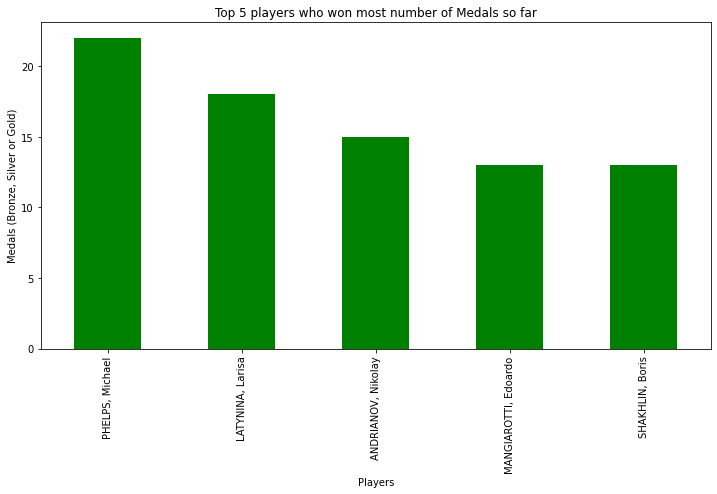

In [26]:
# The only change I will make for this question is that I will group the data by 'Athlete' column
q4 = summer_dataframe.groupby(['Athlete']).count()['Medal'].sort_values(ascending=False).head()
print('>>> Top 5 players who won most number of Medals so far:\n',q3)
q4.plot.bar(xlabel='Players', ylabel='Medals (Bronze, Silver or Gold)', color='green', figsize=(12,6),
                                    title='Top 5 players who won most number of Medals so far')

In [16]:
# I will be using the same approach like the previous question to print the answer 
dic = dict(summer_dataframe.groupby(['Athlete']).count()['Medal'])  
dic = sorted(dic.items(), key=lambda x:x[1], reverse=True)
print(dic[0][0])
print('The player who has most number of medals (Bronze, Silver or Gold) is {} with {} medals.'.format(
    dic[0][0], dic[0][1]
))

PHELPS, Michael
The player who has most number of medals (Bronze, Silver or Gold) is PHELPS, Michael with 22 medals.


**5. Which player has won most number Gold Medals of medals? (Top 5)**

>>> Top 5 players who won most number of Gold Medals so far:
 Athlete
PHELPS, Michael     18
NURMI, Paavo         9
SPITZ, Mark          9
LEWIS, Carl          9
LATYNINA, Larisa     9
Name: Medal, dtype: int64


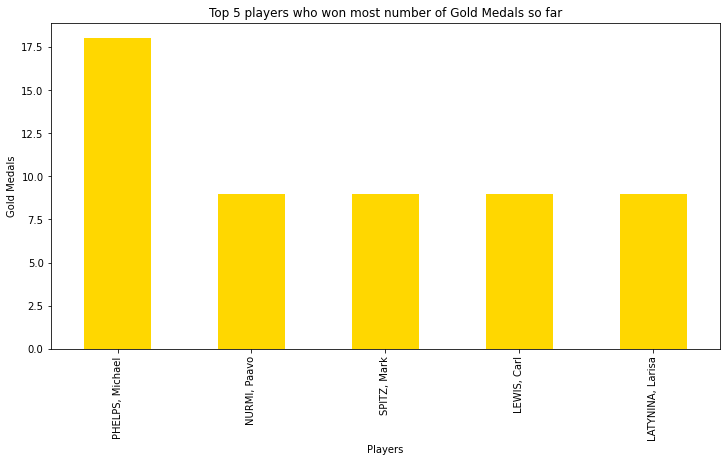

In [17]:
# For this question, I will be filtering my dataframe to only contain gold medals for each record 
df = summer_dataframe[summer_dataframe['Medal'] == 'Gold']
# Then, I'll group the dataframe by each unique athlete according to the number of gold medals each athlete won 
q5 = df.groupby(['Athlete']).count()['Medal'].sort_values(ascending=False).head()
print('>>> Top 5 players who won most number of Gold Medals so far:\n',q5)
q5.plot.bar(xlabel='Players', ylabel='Gold Medals', color='gold', figsize=(12,6),
            title='Top 5 players who won most number of Gold Medals so far')

In [18]:
# I will be using the same approach like the previous question to print the answer 
dic = dict(df.groupby(['Athlete']).count()['Medal'])  
dic = sorted(dic.items(), key=lambda x:x[1], reverse=True)
print(dic[0][0])
print('The player who has most number of Gold medals is {} with {} medals.'.format(
    dic[0][0], dic[0][1]
))

PHELPS, Michael
The player who has most number of Gold medals is PHELPS, Michael with 18 medals.


**6. In which year India won first Gold Medal in Summer Olympics?**

In [19]:
# For this question, I'll be filtering my data to only have records with 'IND' country as well as Gold medals
# IND is the acronym of India 
# With numpy library, I can easily transfer the data frame into an array so I can extract the year easily  
df = np.array(summer_dataframe[(summer_dataframe['Country'] == 'IND') & (summer_dataframe['Medal'] == 'Gold')])
print(df[0][0])
print('In {}, India won its first Gold medal in Summer Olympics.'.format(df[0][0]))

1928
In 1928, India won its first Gold medal in Summer Olympics.


>>> India journey with Gold medals:
 Year
1928    15
1932    11
1936    19
1948    20
1952    14
1956    17
1964    15
1980    16
2008     1
Name: Country, dtype: int64


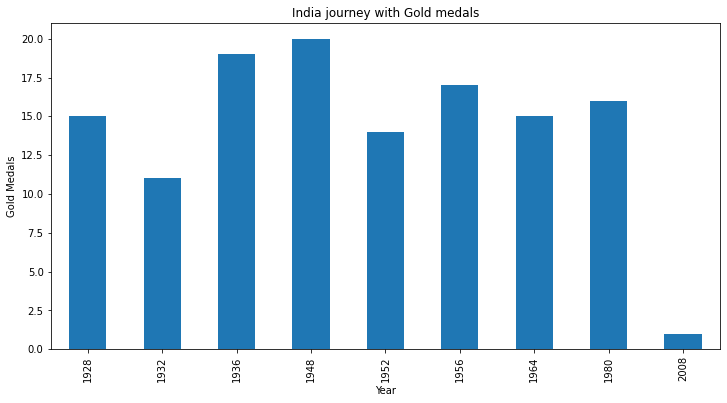

In [9]:
df = summer_dataframe[(summer_dataframe['Medal'] == 'Gold') & (summer_dataframe['Country'] == 'IND')]
q6 = df.groupby(['Year']).count()['Country']
print('>>> India journey with Gold medals:\n', q6)
q6.plot.bar(ylabel='Gold Medals', title='India journey with Gold medals', figsize=(12,6))

**7. Which event is most popular in terms of number of players? (Top 5)**

In [ ]:
summer_dataframe.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


>>> Top 5 most popular events in terms of number of players:
 Event
Football            1497
Hockey              1422
Team Competition    1147
Basketball          1012
Handball             973
Name: Athlete, dtype: int64


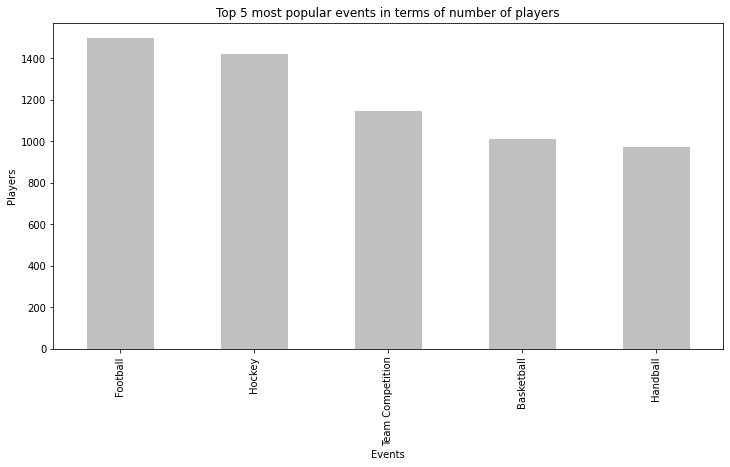

In [20]:
# I'll group the dataframe by each unique Event according to the number of participated athletes  
q7 = summer_dataframe.groupby(['Event']).count()['Athlete'].sort_values(ascending=False).head()
print('>>> Top 5 most popular events in terms of number of players:\n',q7)
q7.plot.bar(xlabel='Events', ylabel='Players', color='silver', figsize=(12,6),
            title='Top 5 most popular events in terms of number of players')

In [21]:
# I will be using the same approach like the previous question to print the answer 
dic = dict(summer_dataframe.groupby(['Event']).count()['Athlete'])  
dic = sorted(dic.items(), key=lambda x:x[1], reverse=True)
print(dic[0][0])
print('The event that has most number of players is {} with {} player.'.format(
    dic[0][0], dic[0][1]
))

Football
The event that has most number of players is Football with 1497 player.


**8. Which sport is having most female Gold Medalists? (Top 5)**

In [22]:
summer_dataframe['Gender'].unique()

array(['Men', 'Women'], dtype=object)

>>> Top 5 Sports that have most female Gold Medalists:
 Sport
Aquatics      589
Athletics     389
Gymnastics    268
Rowing        217
Volleyball    166
Name: Medal, dtype: int64


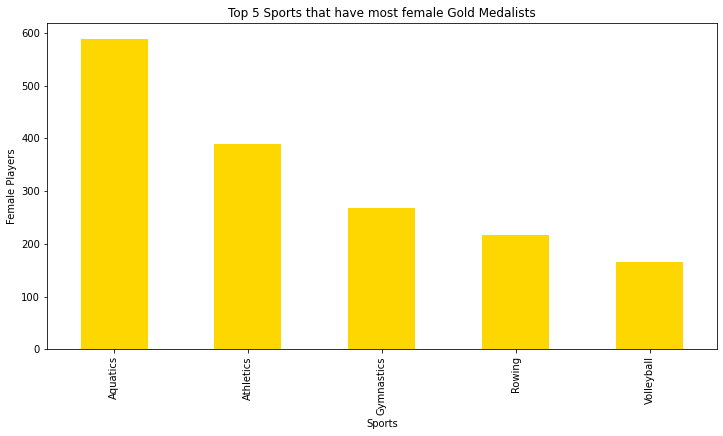

In [23]:
# For this question, I need my dataset to have only records of 'Women' gender and 'Gold' medal
df = summer_dataframe[(summer_dataframe['Gender'] == 'Women') & (summer_dataframe['Medal'] == 'Gold')]
# I'll group the dataframe by each unique sport according to the number of participated female athletes  
q8 = df.groupby(['Sport']).count()['Medal'].sort_values(ascending=False).head()
print('>>> Top 5 Sports that have most female Gold Medalists:\n',q8)
q8.plot.bar(xlabel='Sports', ylabel='Female Players', color='gold', figsize=(12,6),
            title='Top 5 Sports that have most female Gold Medalists')

In [24]:
# I will be using the same approach like the previous question to print the answer 
dic = dict(df.groupby(['Sport']).count()['Medal'])  
dic = sorted(dic.items(), key=lambda x:x[1], reverse=True)
print(dic[0][0])
print('The sport that has most number of female Gold medalists is {} with {} player.'.format(
    dic[0][0], dic[0][1]
))

Aquatics
The sport that has most number of female Gold medalists is Aquatics with 589 player.
